### TELECOM CHURN CASE STUDY
#### Submitted By: ANUSHKUMAR K & MANISH BHARATHI

#### Problem Statement :

#### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
#### For many incumbent operators, retaining high profitable customers is the number one business goal.
#### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
#### In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [2]:
#Imports and suppress warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes',labelsize=12)
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#display max
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [3]:
#Reading and understanding the dataset
telecom_churn=pd.read_csv('C:/Users/Anush/Documents/Python/Telecom_Churn_Case_Study/telecom_churn_data.csv')
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
telecom_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
telecom_churn.shape

(99999, 226)

In [7]:
#Check unique rows in each columns
telecom_churn.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [8]:
#check the missing values in each column
telecom_churn.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

#### Data Cleaning and Preparing the data:

In [9]:
#Handling the missing values
def missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()* 100).sort_values(ascending=False)
    df=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    print(df[~(df['Total']==0)])
    return

In [10]:
#Missing values total and percentage of missing values
missing(telecom_churn)

                          Total    Percent
count_rech_2g_6           74846  74.846748
date_of_last_rech_data_6  74846  74.846748
count_rech_3g_6           74846  74.846748
av_rech_amt_data_6        74846  74.846748
max_rech_data_6           74846  74.846748
total_rech_data_6         74846  74.846748
arpu_3g_6                 74846  74.846748
arpu_2g_6                 74846  74.846748
night_pck_user_6          74846  74.846748
fb_user_6                 74846  74.846748
arpu_3g_7                 74428  74.428744
count_rech_2g_7           74428  74.428744
fb_user_7                 74428  74.428744
count_rech_3g_7           74428  74.428744
arpu_2g_7                 74428  74.428744
av_rech_amt_data_7        74428  74.428744
max_rech_data_7           74428  74.428744
night_pck_user_7          74428  74.428744
total_rech_data_7         74428  74.428744
date_of_last_rech_data_7  74428  74.428744
night_pck_user_9          74077  74.077741
date_of_last_rech_data_9  74077  74.077741
fb_user_9  

There are more columns with missing value percentage greater than 74%. We can remove the columns with more missing values and retain only the significant contributors in the dataset for identifying the high value customers.

In [11]:
telecom_churn.shape

(99999, 226)

In [12]:
missing_df=pd.DataFrame(round(telecom_churn.isnull().sum()/len(telecom_churn.index),2)).reset_index().rename(columns={'index':'columns',0:'Missing Percentage'})
missing_df.sort_values(['Missing Percentage'],ascending=False)

,columns,Missing Percentage
189,arpu_3g_6,0.75
177,av_rech_amt_data_6,0.75
157,date_of_last_rech_data_6,0.75
161,total_rech_data_6,0.75
165,max_rech_data_6,0.75
169,count_rech_2g_6,0.75
217,fb_user_6,0.75
173,count_rech_3g_6,0.75
197,night_pck_user_6,0.75
193,arpu_2g_6,0.75


In [13]:
cols_high_missing_value=missing_df[missing_df['Missing Percentage']>=0.74]['columns'].tolist()
cols_high_missing_value

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [14]:
cols_retained = ['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7']
cols_dropped = [i for i in cols_high_missing_value if i not in cols_retained]
cols_dropped

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [15]:
telecom_churn = telecom_churn.drop(cols_dropped,axis=1)
telecom_churn.shape

(99999, 190)

In [16]:
missing(telecom_churn)

                      Total    Percent
av_rech_amt_data_6    74846  74.846748
total_rech_data_6     74846  74.846748
av_rech_amt_data_7    74428  74.428744
total_rech_data_7     74428  74.428744
loc_ic_t2t_mou_9       7745   7.745077
offnet_mou_9           7745   7.745077
loc_og_t2f_mou_9       7745   7.745077
roam_ic_mou_9          7745   7.745077
std_ic_mou_9           7745   7.745077
std_og_t2t_mou_9       7745   7.745077
roam_og_mou_9          7745   7.745077
loc_og_t2c_mou_9       7745   7.745077
og_others_9            7745   7.745077
spl_ic_mou_9           7745   7.745077
isd_og_mou_9           7745   7.745077
loc_og_t2t_mou_9       7745   7.745077
isd_ic_mou_9           7745   7.745077
ic_others_9            7745   7.745077
loc_og_t2m_mou_9       7745   7.745077
std_ic_t2o_mou_9       7745   7.745077
spl_og_mou_9           7745   7.745077
std_ic_t2f_mou_9       7745   7.745077
std_og_t2m_mou_9       7745   7.745077
loc_ic_t2f_mou_9       7745   7.745077
loc_og_mou_9           77

In [17]:
#Imputing the rest of the values with 0
telecom_churn.fillna(value=0,inplace=True)
telecom_churn.isnull().any().sum()

0

In [18]:
telecom_churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.9

In [19]:
#Remove columns with only one unique value as they are not significant
unique = pd.DataFrame(telecom_churn.nunique()).reset_index().rename(columns={'index':'columns',0:'unique_count'})
cols_with_unique_val=unique[unique['unique_count']==1]['columns'].tolist()
telecom_churn=telecom_churn.drop(cols_with_unique_val,axis=1)
telecom_churn.shape

(99999, 177)

In [20]:
#Removing date columns as they have no role in churn prediction
date_columns = telecom_churn.columns[telecom_churn.columns.str.contains('date')].tolist()
telecom_churn = telecom_churn.drop(date_columns,axis=1)
telecom_churn.shape

(99999, 170)

In [21]:
#Dropping mobile number as it is also insignificant
telecom_churn=telecom_churn.drop('mobile_number',1)
telecom_churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.0,1.0,0.0,154.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,

In [22]:
#Deriving new features from the columns
telecom_churn['avg_rev_goodmonths']=(telecom_churn['arpu_6']+telecom_churn['arpu_7'])/2
telecom_churn['minutes_to_callcenter']=telecom_churn['loc_og_t2c_mou_6']+telecom_churn['loc_og_t2c_mou_7']
old=telecom_churn['aon'].quantile(0.75)
mid=telecom_churn['aon'].mean()
new=telecom_churn['aon'].quantile(0.25)
def age_on_nw(x):
    if x>=old:
        cust_group='Very Old'
    elif x>=mid and x<old:
        cust_group='Old'
    elif x>=new and x<mid:
        cust_group='New'
    else:
        cust_group='Just Joined'
    return cust_group
telecom_churn['cust_group']=telecom_churn['aon'].apply(age_on_nw)
telecom_churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,cust_group
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,206.1005,0.00,New
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.0,1.0,0.0

In [23]:
telecom_churn['cust_group'].value_counts()

New            37965
Very Old       25000
Just Joined    24927
Old            12107
Name: cust_group, dtype: int64

#### Filter High Value Customers

In [24]:
telecom_churn['tot_call_rech_goodmonths']=telecom_churn['total_rech_amt_6']+telecom_churn['total_rech_amt_7']
telecom_churn['tot_data_rech_goodmonths']=(telecom_churn['total_rech_data_6']*telecom_churn['av_rech_amt_data_6'])+(telecom_churn['total_rech_data_7']*telecom_churn['av_rech_amt_data_7'])
telecom_churn['avg_rech_goodmonths']=(telecom_churn['tot_call_rech_goodmonths']+telecom_churn['tot_data_rech_goodmonths'])/2
len(telecom_churn[telecom_churn['avg_rech_goodmonths']>=round(telecom_churn['avg_rech_goodmonths'].quantile(0.7))].index)

30001

In [25]:
high_val_customers=telecom_churn[telecom_churn['avg_rech_goodmonths']>=round(telecom_churn['avg_rech_goodmonths'].quantile(0.7))]
high_val_customers.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,cust_group,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,206.1005,0.0,New,614,504.0,559.0
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428

In [26]:
high_val_customers.shape

(30001, 175)

In [27]:
#Tagging churners and removing the attributes of the churn phase
high_val_customers['churn']=(high_val_customers['total_ic_mou_9']==0) & (high_val_customers['total_og_mou_9']==0) & (high_val_customers['vol_2g_mb_9']==0) & (high_val_customers['vol_3g_mb_9']==0)
high_val_customers['churn']=high_val_customers['churn'].apply(lambda x:1 if x else 0)
high_val_customers.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,cust_group,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths,churn
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,206.1005,0.0,New,614,504.0,559.0,1
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,180.54,173.08,193.94,0.00,626.46,55

In [28]:
#Churn rate for highly valued customers
high_val_customers['churn'].sum()/len(high_val_customers.index)

0.08136395453484883

In [29]:
churn_columns=high_val_customers.columns[high_val_customers.columns.str.contains('_9')].tolist()
churn_columns

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [30]:
high_val_customers=high_val_customers.drop(churn_columns,axis=1)
high_val_customers.shape

(30001, 136)

In [31]:
high_val_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 136 entries, arpu_6 to churn
dtypes: float64(108), int64(27), object(1)
memory usage: 31.4+ MB


### EXPLANATORY DATA ANALYSIS

In [32]:
high_val_customers.shape

(30001, 136)

In [33]:
high_val_customers_numeric=high_val_customers.select_dtypes(exclude=['object'])
high_val_customers_numeric.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,206.1005,0.0,614,504.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1209.5150,0.0,2370,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,0.0,177.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,435.4720,0.0

In [35]:
def redundant_pairs(df):
    drop_pairs=set()
    cols=df.columns
    for i in range(0,df.shape[1]):
        for j in range(0,i+1):
            drop_pairs.add((cols[i],cols[j]))
    return drop_pairs
def top_correlations(df,n=5):
    au_corr=df.corr().abs().unstack()
    labels_to_drop=redundant_pairs(df)
    au_corr=au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print("Top Correlations")
print(top_correlations(high_val_customers_numeric,10))

Top Correlations
avg_rev_goodmonths        tot_call_rech_goodmonths    0.976752
arpu_8                    total_rech_amt_8            0.955351
arpu_6                    total_rech_amt_6            0.946125
arpu_7                    total_rech_amt_7            0.943588
isd_og_mou_7              isd_og_mou_8                0.943120
tot_data_rech_goodmonths  avg_rech_goodmonths         0.925434
isd_og_mou_6              isd_og_mou_8                0.918187
arpu_7                    avg_rev_goodmonths          0.917873
isd_og_mou_6              isd_og_mou_7                0.915247
arpu_6                    avg_rev_goodmonths          0.910567
dtype: float64


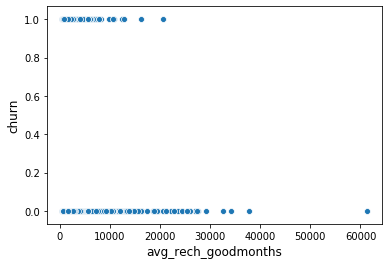

In [37]:
sns.scatterplot(high_val_customers['avg_rech_goodmonths'],high_val_customers['churn'])
plt.show()

We infer from the above that when recharge is more in the good months then there is less probability of churn.

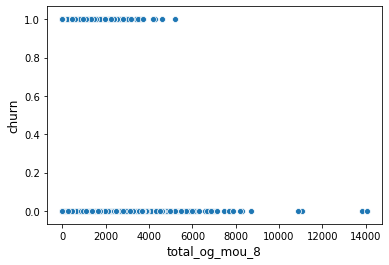

In [39]:
sns.scatterplot(high_val_customers['total_og_mou_8'],high_val_customers['churn'])
plt.show()

Higher the total outgoing minutes of usage during action phase lower is the probability of churn

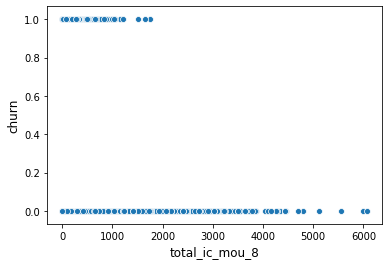

In [40]:
sns.scatterplot(high_val_customers['total_ic_mou_8'],high_val_customers['churn'])
plt.show()

Higher the total incoming minutes of usage during action phase lower is the churn probability

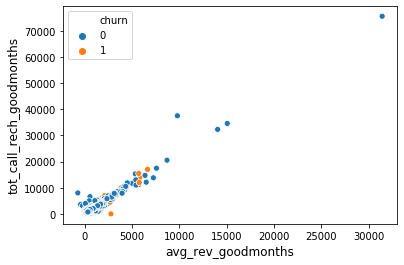

In [42]:
sns.scatterplot(high_val_customers['avg_rev_goodmonths'],high_val_customers['tot_call_rech_goodmonths'],hue=high_val_customers['churn'])
plt.show()

churns are more likely to happen when the average revenue per user is less

In [43]:
cust_group_df=high_val_customers.groupby(['cust_group','churn']).size().reset_index().rename(columns={0:'Number of customers'})
cust_group_df

,cust_group,churn,Number of customers
0,Just Joined,0,6767
1,Just Joined,1,904
2,New,0,10324
3,New,1,1069
4,Old,0,3465
5,Old,1,200
6,Very Old,0,7004
7,Very Old,1,268


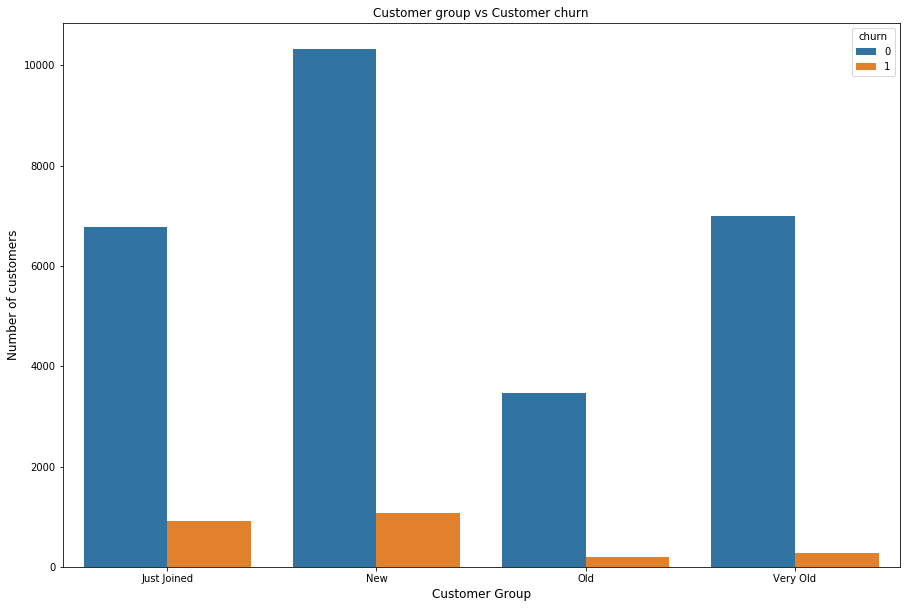

In [46]:
plt.figure(figsize=(15,10))
ax=sns.barplot(data=cust_group_df,x='cust_group',y='Number of customers',hue='churn')
ax.set_title('Customer group vs Customer churn')
ax.set_xlabel('Customer Group')
ax.set_ylabel('Number of customers')
plt.show()

From the above plot, we see that the churn percentage is high for customers who are just associated with the provider.The churn percentage is lowest for the customers whose age on network is very large as they are loyal to the network and less likely to leave.

### MODEL BUILDING

In [33]:
high_val_customers.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,cust_group,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,206.1005,0.0,New,614,504.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1209.5150,0.0,New,2370,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,0.0,177.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.1

In [34]:
#Creating dummy variable for categorical column
df1=pd.get_dummies(high_val_customers['cust_group'],prefix='cust_group',drop_first=True)
high_val_customers=pd.concat([high_val_customers,df1],axis=1)
high_val_customers = high_val_customers.drop('cust_group',1)
high_val_customers.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths,churn,cust_group_New,cust_group_Old,cust_group_Very Old
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,206.1005,0.0,614,504.0,559.0,1,1,0,0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1209.5150,0.0,2370,0.0,1185.0,1,1,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,0.0,177.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1

In [35]:
#Using PCA for dimension reduction
from sklearn.model_selection import train_test_split
#Assigning feature variable to X
X=high_val_customers.drop(['churn'],axis=1)
#Assigning response variable to y
y=high_val_customers['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [36]:
y.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [37]:
y.value_counts()/len(y.index)

0    0.918636
1    0.081364
Name: churn, dtype: float64

The percentage of churn is very less and hence we need to handle the imbalance in the class

In [38]:
#Splitting test and train datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
X_train.shape

(21000, 137)

In [39]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths,cust_group_New,cust_group_Old,cust_group_Very Old
39186,1086.343,910.298,592.623,5.69,8.28,4.84,151.89,159.01,98.06,28.96,26.66,31.11,6.13,14.38,9.86,5.39,7.39,4.84,21.63,30.58,19.81,1.19,0.00,0.00,0.0,6.40,1.10,28.23,37.98,24.66,0.00,0.00,0.00,2.61,10.89,13.26,0.00,0.00,0.00,2.61,10.89,13.26,120.61,95.48,54.01,0.00,8.55,1.10,0.00,0.0,0.0,151.46,152.91,93.04,15.29,35.24,46.11,134.14,140.98,105.54,7.18,9.74,2.18,156.63,185.98,153.84,0.00,0.00,0.00,17.44,32.93,57.56,0.00,0.00,0.00,17.44,32.93,57.56,433.09,356.41,266.61,0.00,0.0,0.0,259.01,135.48,55.19,0.00,2.01,0.00,8,5,3,1481,892,658,398,459,229,398,35,200,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,3651,0.00,0.00,0.00,0.0,998.3205,6.40,2373,0.0,1186.5,0,0,1
39833,513.359,311.602,364.126,144.89,49.84,40.71,321.14,227.63,265.41,0.00,0.00,0.00,0.00,0.00,0.00,64.46,30.58,40.71,277.44,179.54,211.56,12.14,5.18,34.54,0.0,16.51,0.00,354.06,215.31,286.83,80.43,19.26,0.00,31.54,19.59,19.29,0.00,6.78,0.00,111.98,45.64,19.29,0.00,0.00,0.00,0.00,16.51,0.00,0.00,0.0,0.0,466.04,277.48,306.13,27.43,21.46,36.66,143.86,204.43,242.16,91.86,57.33,13.73,263.16,283.23,292.56,15.63,14.01,0.00,29.08,28.99,22.28,35.48,3.90,0.00,80.19,46.91,22.28,402.46,342.28,320.68,0.00,0.0,0.0,52.03,10.75,5.64,7.06,1.38,0.18,8,7,5,576,393,488,110,120,130,110,98,130,2.0,3.0,196.0,148.0,10.09,143.24,338.96,345.17,144.03,171.28,0,0,0,2,3,1,0,0,0,0,0,0,2347,184.09,147.56,274.99,0.0,412.4805,16.51,969,836.0,902.5,0,0,1
38778,298.315,314.180,313.407,69.33,77.09,83.28,333.28,298.38,213.34,17.73,42.28,68.41,22.99,21.33,76.69,21.54,11.61,26.54,210.16,218.54,127.33,3.13,6.98,0.00,0.0,0.00,0.00,234.84,237.14,153.88,43.54,61.19,27.16,101.21,55.79,38.88,0.00,0.00,0.00,144.76,116.99,66.04,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.0,0.0,379.61,354.31,219.93,16.94,27.19,46.71,84.51,141.73,148.01,0.01,0.00,4.74,101.48,168.93,199.48,9.73,7.38,32.43,23.16,36.14,37.18,0.00,0.00,0.00,32.89,43.53,69.61,134.38,226.23,295.31,0.00,0.0,0.0,0.00,13.76,13.33,0.00,0.00,12.88,8,9,10,375

In [40]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths,cust_group_New,cust_group_Old,cust_group_Very Old
20296,539.240,537.575,281.034,15.91,5.51,7.99,54.24,14.86,22.36,0.00,0.0,0.00,0.00,0.00,0.00,3.51,3.21,7.99,44.98,4.41,13.99,3.58,1.51,1.69,0.03,0.00,0.00,52.08,9.14,23.69,12.39,2.30,0.00,4.66,8.93,5.74,0.98,0.00,0.91,18.04,11.23,6.66,0.0,0.0,0.0,1.28,3.39,3.09,0.00,0.00,0.0,71.41,23.78,33.46,8.49,5.06,2.64,51.14,32.38,21.04,8.78,15.51,22.96,68.43,52.96,46.66,28.44,0.00,0.00,8.01,1.69,3.64,5.46,0.00,0.00,41.93,1.69,3.64,110.36,54.66,50.31,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,12,11,4,710,747,302,120,150,144,30,150,144,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,667,0.0,0.00,0.00,0.0,538.4075,0.03,1457,0.0,728.5,1,0,0
8279,79.431,208.200,78.834,15.88,9.33,9.46,26.61,21.34,3.56,5.76,0.0,3.38,3.89,10.28,5.06,7.89,0.96,2.89,1.11,4.06,0.08,0.00,0.00,0.00,19.09,9.96,2.73,9.01,5.03,2.98,4.21,7.58,2.25,0.00,0.33,0.00,0.00,0.00,0.00,4.21,7.91,2.25,0.0,0.0,0.0,25.36,7.44,2.73,0.00,0.00,0.0,38.59,20.39,7.96,25.51,44.06,5.78,0.30,12.06,2.18,0.00,0.00,0.00,25.81,56.13,7.96,3.61,0.00,16.11,0.00,0.13,0.00,0.00,0.00,0.00,3.61,0.13,16.11,29.43,56.26,24.08,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5,17,7,74,250,80,30,25,30,17,14,0,2.0,9.0,34.0,149.0,168.60,297.22,174.63,0.00,0.00,0.0,0,0,0,2,9,2,0,0,0,0,0,1,731,0.0,0.00,0.00,0.0,143.8155,29.05,324,1409.0,866.5,1,0,0
72269,716.917,721.802,625.488,347.81,227.36,232.86,819.18,809.29,870.48,0.00,0.0,0.00,0.00,0.00,0.00,313.09,162.96,159.09,751.01,697.34,648.71,3.55,0.00,2.59,0.00,0.00,10.04,1067.66,860.31,810.41,34.71,64.39,73.76,46.23,109.18,200.29,3.63,2.76,9.41,84.58,176.34,283.48,0.0,0.0,0.0,14.75,0.00,10.99,2.01,0.00,0.0,1169.01,1036.66,1104.89,93.86,53.26,31.31,352.79,355.58,366.34,12.98,3.91,14.19,459.64,412.76,411.86,7.08,10.35,9.83,11.29,27.53,27.43,5.73,2.20,10.34,24.11,40.08,47.61,484.16,453.41,459.81,0.00,0.0,0.0,0.00,0.00,0.23,0.39,0.56,0.09,12,8,8,937,814,763,128,179,169,128,169,130,2.0,2.0,90.0,228.0,1.88,0.13,0.00,401.63,1865.55,0.0,0,0,0,0,0,0,0,1,0,2,1,0,229,0.0,

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths,cust_group_New,cust_group_Old,cust_group_Very Old
0,1.115484,0.688737,0.152667,-0.557530,-0.541565,-0.498528,-0.461376,-0.438796,-0.489079,0.166015,0.177751,0.252122,-0.178395,-0.062395,-0.095051,-0.347750,-0.323913,-0.316741,-0.562058,-0.545416,-0.560932,-0.227853,-0.290731,-0.304296,-0.254831,0.482122,-0.077536,-0.596067,-0.576507,-0.573805,-0.411127,-0.413976,-0.373254,-0.433396,-0.407680,-0.350559,-0.156374,-0.141659,-0.143638,-0.567225,-0.550501,-0.480652,2.238915,1.762919,0.997135,-0.326117,0.065368,-0.272720,-0.140957,-0.01516,-0.016828,-0.665728,-0.661873,-0.650555,-0.305558,-0.187825,-0.102345,-0.080491,-0.054874,-0.190812,-0.177672,-0.127684,-0.279557,-0.238765,-0.156357,-0.225379,-0.184858,-0.179917,-0.191835,-0.117328,0.019944,0.279901,-0.135600,-0.136123,-0.124243,-0.207719,-0.107215,0.092803,0.378162,0.154991,-0.037517,-0.308577,-0.13577,-0.234992,3.273325,1.628862,0.689833,-0.074812,0.027293,-0.088662,-0.415802,-0.717597,-0.751786,1.415590,0.373331,0.109025,1.293454,1.573734,0.391372,2.047579,-0.456642,0.716280,-0.587543,-0.598072,-0.664112,-0.670667,-0.388365,-0.375952,-0.337356,-0.364613,-0.394511,-0.373871,-0.401189,-0.408175,-0.376513,-0.423358,-0.442850,-0.416085,-0.360796,-0.34396,-0.343262,-0.211037,-0.207517,-0.184095,2.582178,-0.401980,-0.400504,-0.382233,-0.15069,0.963902,0.224088,0.960330,-0.411648,0.024772,-0.781774,-0.376812,1.791205
1,-0.096775,-0.500253,-0.275833,-0.252141,-0.454845,-0.420576,-0.109409,-0.302716,-0.143763,-0.211944,-0.168046,-0.169673,-0.232413,-0.211540,-0.192132,-0.090037,-0.228832,-0.162589,0.442672,0.066070,0.255949,0.253079,-0.057653,1.482865,-0.254831,1.558365,-0.224949,0.255810,-0.108254,0.138304,-0.209983,-0.368013,-0.373254,-0.361800,-0.387785,-0.335932,-0.156374,0.374211,-0.143638,-0.385503,-0.496402,-0.470802,-0.044048,-0.043860,-0.040774,-0.326117,0.425045,-0.327945,-0.140957,-0.01516,-0.016828,-0.208102,-0.489158,-0.348594,-0.232073,-0.269922,-0.160619,-0.037617,0.227862,0.434676,1.648758,0.845531,-0.014239,0.091764,0.147304,0.21

In [42]:
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths,cust_group_New,cust_group_Old,cust_group_Very Old
0,-0.041340,-0.040272,-0.527409,-0.527626,-0.544522,-0.496954,-0.656582,-0.736710,-0.656954,-0.209263,-0.164013,-0.166297,-0.220991,-0.205378,-0.185157,-0.349184,-0.347566,-0.321774,-0.479747,-0.665577,-0.598871,-0.130749,-0.226837,-0.211448,-0.233613,-0.225240,-0.270010,-0.534767,-0.661586,-0.601299,-0.380172,-0.407641,-0.373687,-0.425260,-0.414392,-0.374997,-0.056387,-0.138396,-0.056779,-0.539033,-0.554684,-0.499536,-0.08126,-0.080753,-0.0832,-0.267351,-0.177955,-0.166297,-0.300584,-0.018372,-0.025023,-0.773093,-0.848005,-0.751558,-0.350845,-0.368353,-0.395750,-0.472160,-0.568082,-0.595539,-0.139408,-0.012988,0.197170,-0.529618,-0.579769,-0.584350,0.180698,-0.200725,-0.202917,-0.228131,-0.267469,-0.250756,0.195870,-0.168902,-0.143590,-0.038259,-0.328087,-0.313718,-0.501936,-0.652595,-0.648136,-0.378050,-0.0832,-0.252921,-0.145388,-0.145073,-0.151858,-0.123898,-0.128617,-0.132343,0.012036,-0.066172,-0.644154,0.098766,0.185781,-0.540758,-0.272899,-0.118648,-0.088869,-0.494556,0.393988,0.394110,-0.592640,-0.603518,-0.627151,-0.689423,-0.371040,-0.380552,-0.339420,-0.410572,-0.431663,-0.406744,-0.401194,-0.403867,-0.381669,-0.429860,-0.446026,-0.415747,-0.342889,-0.357159,-0.338128,-0.215705,-0.211524,-0.183782,-0.583048,-0.401333,-0.409978,-0.376777,-0.159943,-0.046985,-0.266523,0.167169,-0.369186,-0.293828,1.275341,-0.364182,-0.582781
1,-1.107511,-0.826277,-1.008946,-0.527690,-0.536592,-0.493719,-0.713395,-0.723382,-0.696450,-0.133017,-0.164013,-0.121215,-0.189188,-0.097568,-0.139867,-0.329957,-0.357246,-0.345557,-0.663100,-0.667056,-0.659055,-0.305049,-0.297813,-0.296352,2.790425,0.934851,0.145088,-0.651673,-0.672767,-0.660148,-0.399983,-0.395251,-0.368055,-0.436347,-0.434631,-0.389287,-0.137240,-0.138396,-0.149827,-0.561195,-0.559922,-0.506868,-0.08126,-0.080753,-0.0832,1.199579,0.015216,-0.183279,-0.300584,-0.018372,-0.025023,-0.820057,-0.852795,-0.788614,-0.244643,-0.133903,-0.374961,-0.725741,-0.668155,-0.686932,-0.337657,-0.324567,-0

In [43]:
#Importing PCA module
from sklearn.decomposition import PCA
pca=PCA(svd_solver='randomized',random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [44]:
pca.components_

array([[ 1.76948586e-01,  1.84473609e-01,  1.77020935e-01, ...,
        -7.09113690e-03,  7.61172414e-03,  2.45963353e-02],
       [ 2.47084594e-03,  1.26929465e-02, -2.35863176e-03, ...,
         5.46342177e-02, -1.01986402e-02, -8.44284493e-02],
       [ 1.39567166e-01,  1.60742327e-01,  1.49504077e-01, ...,
         1.13379103e-02, -6.07476710e-03, -3.39667368e-02],
       ...,
       [-0.00000000e+00, -3.98986399e-17,  1.36661446e-17, ...,
         5.03069808e-17,  8.67361738e-17,  5.68121938e-17],
       [-0.00000000e+00,  9.40220124e-16, -6.39489831e-17, ...,
        -1.09287579e-16, -7.28583860e-17, -1.53089347e-16],
       [ 4.14676647e-01,  4.41764560e-01, -2.49800181e-16, ...,
        -4.04407410e-17,  5.57822018e-17, -1.93530088e-17]])

In [45]:
colnames=list(X_train.columns)
pcs_df=pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.176949,0.002471,arpu_6
1,0.184474,0.012693,arpu_7
2,0.177021,-0.002359,arpu_8
3,0.109134,0.116351,onnet_mou_6
4,0.118103,0.130108,onnet_mou_7
5,0.118731,0.114244,onnet_mou_8
6,0.156057,0.063793,offnet_mou_6
7,0.162924,0.080692,offnet_mou_7
8,0.157648,0.062385,offnet_mou_8
9,0.024447,0.005493,roam_ic_mou_6


In [46]:
pca.explained_variance_ratio_

array([1.12595418e-01, 8.05900858e-02, 6.34934553e-02, 4.54073104e-02,
       4.33656371e-02, 3.49654843e-02, 3.05059087e-02, 2.69121266e-02,
       2.58178580e-02, 2.38881234e-02, 2.30464685e-02, 2.13890483e-02,
       2.05904872e-02, 1.95464575e-02, 1.83260316e-02, 1.75918779e-02,
       1.52833849e-02, 1.48092196e-02, 1.41979107e-02, 1.39758447e-02,
       1.31274889e-02, 1.29007534e-02, 1.14222016e-02, 1.12673413e-02,
       1.02961859e-02, 1.02728687e-02, 9.72189290e-03, 9.53671497e-03,
       8.83551813e-03, 8.44396170e-03, 8.30980336e-03, 7.94932635e-03,
       7.89785607e-03, 7.60817863e-03, 7.29817287e-03, 6.90702735e-03,
       6.78704566e-03, 6.37674840e-03, 6.31090374e-03, 6.16556541e-03,
       5.89279317e-03, 5.63730199e-03, 5.31518542e-03, 5.25978181e-03,
       5.04579048e-03, 4.91448964e-03, 4.76386346e-03, 4.63655070e-03,
       4.35828003e-03, 4.18850988e-03, 4.12131249e-03, 4.00193586e-03,
       3.88866686e-03, 3.56646518e-03, 3.48205288e-03, 3.42268184e-03,
      

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11259542, 0.1931855 , 0.25667896, 0.30208627, 0.34545191,
       0.38041739, 0.4109233 , 0.43783543, 0.46365328, 0.48754141,
       0.51058788, 0.53197692, 0.55256741, 0.57211387, 0.5904399 ,
       0.60803178, 0.62331516, 0.63812438, 0.65232229, 0.66629814,
       0.67942563, 0.69232638, 0.70374858, 0.71501592, 0.72531211,
       0.73558498, 0.74530687, 0.75484359, 0.7636791 , 0.77212307,
       0.78043287, 0.7883822 , 0.79628005, 0.80388823, 0.8111864 ,
       0.81809343, 0.82488048, 0.83125722, 0.83756813, 0.84373369,
       0.84962649, 0.85526379, 0.86057897, 0.86583876, 0.87088455,
       0.87579904, 0.8805629 , 0.88519945, 0.88955773, 0.89374624,
       0.89786755, 0.90186949, 0.90575816, 0.90932462, 0.91280667,
       0.91622936, 0.9195123 , 0.92275506, 0.92587373, 0.92881937,
       0.93173735, 0.93456236, 0.93735212, 0.93995   , 0.94251714,
       0.94503824, 0.94750152, 0.94987554, 0.95211617, 0.95430329,
       0.95644677, 0.95847545, 0.96048529, 0.96245383, 0.96438

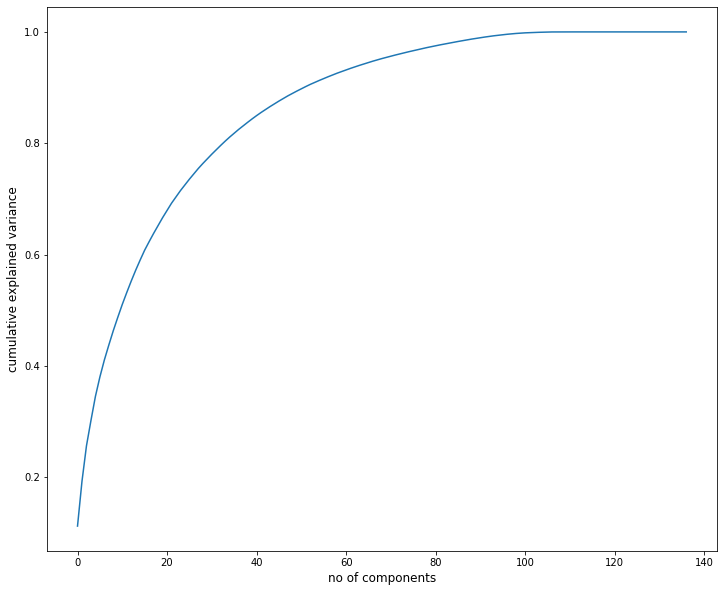

In [48]:
#Making a screenplot
fig=plt.figure(figsize=(12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the above figure we can observe that the from 50-60 components are sufficient for modeling to describe 90% variance approximately

In [49]:
#Using incrmental PCA 
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=56)
X_train_pca=pd.DataFrame(pca_final.fit_transform(X_train))
X_train_pca.shape

(21000, 56)

In [50]:
#Creating correlation matrix for principal components
corrmat=np.corrcoef(X_train_pca.transpose())
corr_diag=corrmat-np.diagflat(corrmat.diagonal())
print("maximum correlation :",corr_diag.max())
print("minimum correlation :",corr_diag.min())

maximum correlation : 0.047278912273069226
minimum correlation : -0.03596063840959734


In [51]:
#Logistic Regression on PCA dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#Making prediction on test data
X_test_pca=pca_final.transform(X_test)
y_pred=lr.predict(X_test_pca)
y_pred[:5]
print("Accuracy:{}".format(accuracy_score(y_test,y_pred)))

Accuracy:0.807799133429619


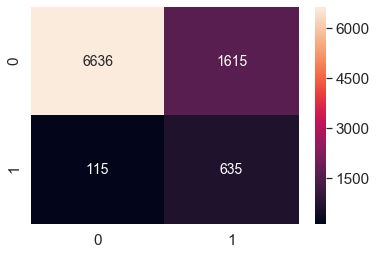

In [53]:
df_confusion = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_confusion, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [54]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(precision)
print(recall)

Sensitivity:0.828
Specificity:0.817
0.2919605077574048
0.828


In [56]:
pred_prob_test=lr.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(roc_auc_score(y_test,pred_prob_test)))

AUC:0.89


In [57]:
from sklearn import metrics
def roc_curve(actual,prob):
    fpr,tpr,thresholds=metrics.roc_curve(actual,prob,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,prob)
    plt.figure(figsize=(10,10))
    plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

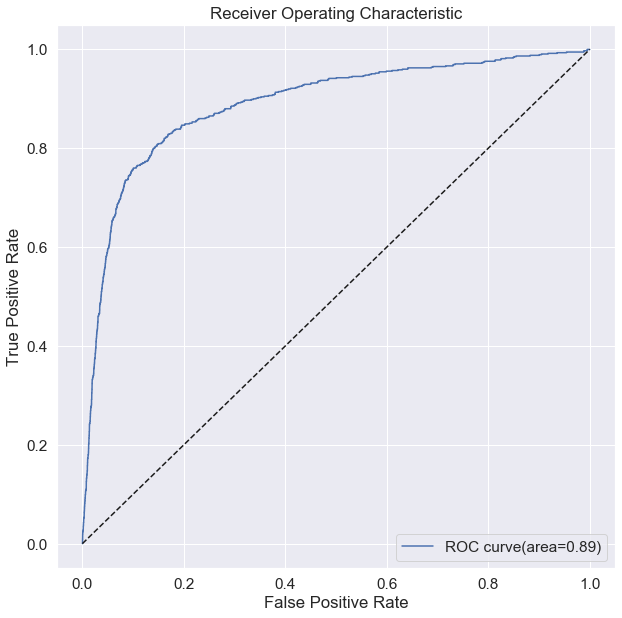

In [58]:
roc_curve(y_test,pred_prob_test)

#### Decision Tree on PCA dataset

In [59]:
#Fitting decision tree with default hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt_default_df=DecisionTreeClassifier(class_weight={0:0.08,1:0.92})
dt_default_df.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight={0: 0.08, 1: 0.92}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

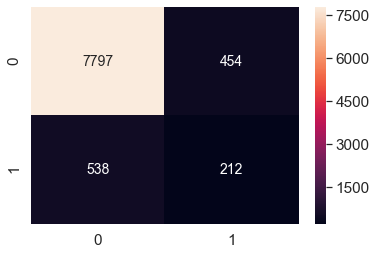

In [60]:
#Making predictions
y_pred=dt_default_df.predict(X_test_pca)
df_cm=pd.DataFrame(confusion_matrix(y_test,y_pred),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={"size":14},fmt='g')
plt.show()

In [61]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(precision)
print(recall)

Sensitivity:0.828
Specificity:0.817
Accuracy:0.818
0.2919605077574048
0.828


The sensitivity value is very low using the decision tree model

In [63]:
#Hyperparameter Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':range(5,15,5),
    'min_samples_leaf':range(50,150,50),
    'min_samples_split':range(50,150,50),
    'criterion':["entropy","gini"]
}
n_folds=5

#Instantiate grid search model
dtree=DecisionTreeClassifier(class_weight={0:0.08,1:0.92})
grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,verbose=1,n_jobs=-1,scoring='recall')
#Fit the grid search
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight={0: 0.08, 1: 0.92},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
          

In [64]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [66]:
#Scores of GridSearch
scores=grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.274188,3.127197,0.040202,0.015855,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.637168,0.724852,0.763314,0.763314,0.721893,0.722104,0.046087,11
1,8.427682,1.671196,0.023201,0.000400,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.637168,0.724852,0.763314,0.763314,0.721893,0.722104,0.046087,11
2,8.601692,2.726307,0.034002,0.013039,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.651917,0.715976,0.757396,0.763314,0.736686,0.725054,0.040194,9
3,8.448883,2.778271,0.030002,0.012507,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.651917,0.715976,0.757396,0.763314,0.736686,0.725054,0.040194,9
4,13.233557,4.528733,0.036802,0.025609,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.725664,0.650888,0.692308,0.742604,0.760355,0.714362,0.038873,16


In [68]:
#Instantiate the Grid Search model
dtree=DecisionTreeClassifier(class_weight={0:0.1,1:0.9},max_depth=10,min_samples_leaf=100,min_samples_split=50,criterion='gini')
dtree.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

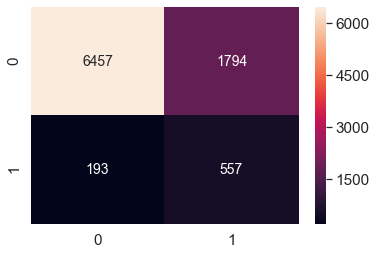

In [69]:
#Making Predictions
y_pred=dtree.predict(X_test_pca)
df_cm=pd.DataFrame(confusion_matrix(y_test,y_pred),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={"size":14},fmt='g')
plt.show()

In [70]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(precision)
print(recall)

Sensitivity:0.828
Specificity:0.817
Accuracy:0.818
0.2919605077574048
0.828


In [74]:
pred_prob_test=dtree.predict_proba(X_test_pca)[:,1]
print("AUC is :{:2.2f}".format(metrics.roc_auc_score(y_test,pred_prob_test)))

AUC is :0.83


#### We can observe that the sensitivity has increased significantly after the tuning.

#### Random Forest on PCA dataset

In [103]:
#Running random forest with default parameters
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight={0:0.08,1:0.92})
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.08, 1: 0.92},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [104]:
#Making Prediction
y_pred=rfc.predict(X_test_pca)

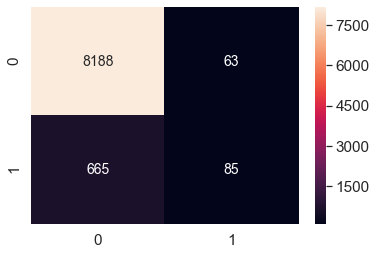

In [105]:
df_cm=pd.DataFrame(confusion_matrix(y_test,y_pred),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={"size":14},fmt='g')
plt.show()

In [106]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(precision)
print(recall)

Sensitivity:0.828
Specificity:0.817
Accuracy:0.818
0.2919605077574048
0.828


In [108]:
pred_prob_test=rfc.predict_proba(X_test_pca)[:,1]
print("AUC is :{:2.2f}".format(metrics.roc_auc_score(y_test,pred_prob_test)))

AUC is :0.82


In [81]:
#HyperParameter Tuning
param_grid={
    'max_depth':[4,8,10],
    'min_samples_leaf':range(100,400,200),
    'min_samples_split':range(200,500,200),
    'n_estimators':[100,200,300],
    'max_features':[5,10]
}
rf=RandomForestClassifier(class_weight={0:0.08,1:0.92})
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1,scoring='recall')

In [82]:
#Fit the grid search
grid_search.fit(X_train_pca,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 40.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.08, 1: 0.92},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                     

In [83]:
#printing optimaum accuracy score and hyperparameters
print('Recall of :',grid_search.best_score_,'using',grid_search.best_params_)

Recall of : 0.7581334626641305 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 300, 'min_samples_split': 400, 'n_estimators': 100}


In [84]:
#model with best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=10,min_samples_leaf=300,min_samples_split=400,max_features=10,n_estimators=100,class_weight={0:0.08,1:0.92})

In [85]:
#Model fitting
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.08, 1: 0.92},
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=300,
                       min_samples_split=400, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [87]:
#Making predictions
y_pred=rfc.predict(X_test_pca)
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

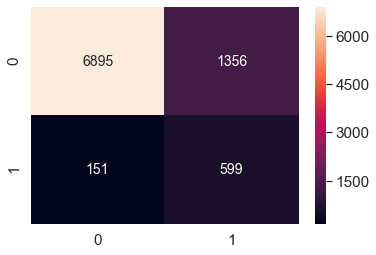

In [88]:
df_cm=pd.DataFrame(confusion_matrix(y_test,y_pred),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={"size":14},fmt='g')
plt.show()

In [89]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(precision)
print(recall)

Sensitivity:0.828
Specificity:0.817
Accuracy:0.818
0.2919605077574048
0.828


In [109]:
pred_prob_test=rfc.predict_proba(X_test_pca)[:,1]
print("AUC is :{:2.2f}".format(metrics.roc_auc_score(y_test,pred_prob_test)))

AUC is :0.82


### Inference from the above models for churn prediction

We performed the PCA reduction tehnique on the dataset for dimensionality reduction and applied different models on the reduced dataset to predict if the high value customer will churn out or not.

Recall oor Sensitivity would be the perfect indicators for identifying the churners.

We applied multiple models and hypertuned the parameters to have optimal performance. We handled the class imbalance with the class_weigh as balanced which is penalizing the minority of the dataset.

#### Logistic Regression:
Accuracy:0.8
Sensitivity:0.79
Specificity:0.836
AUC Score:0.89

#### Decision Tree:
Accuracy:0.77
Sensitivity:0.74
Specificity:0.78
AUC Score:0.83

#### Random Forest:
Sensitivity:0.79
Specificity:0.83
Accuracy:0.83
AUC Score:0.82

From the above metrics we could observe that, best performing model based on Sensitivity and AUC parameters is Random Forest. The false negatives are lower and it has the a better AUC as well.

### Model building for identifying the important predictor variables

In [94]:
#Using same X_train and X_test datasets
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths,cust_group_New,cust_group_Old,cust_group_Very Old
0,1.115484,0.688737,0.152667,-0.557530,-0.541565,-0.498528,-0.461376,-0.438796,-0.489079,0.166015,0.177751,0.252122,-0.178395,-0.062395,-0.095051,-0.347750,-0.323913,-0.316741,-0.562058,-0.545416,-0.560932,-0.227853,-0.290731,-0.304296,-0.254831,0.482122,-0.077536,-0.596067,-0.576507,-0.573805,-0.411127,-0.413976,-0.373254,-0.433396,-0.407680,-0.350559,-0.156374,-0.141659,-0.143638,-0.567225,-0.550501,-0.480652,2.238915,1.762919,0.997135,-0.326117,0.065368,-0.272720,-0.140957,-0.01516,-0.016828,-0.665728,-0.661873,-0.650555,-0.305558,-0.187825,-0.102345,-0.080491,-0.054874,-0.190812,-0.177672,-0.127684,-0.279557,-0.238765,-0.156357,-0.225379,-0.184858,-0.179917,-0.191835,-0.117328,0.019944,0.279901,-0.135600,-0.136123,-0.124243,-0.207719,-0.107215,0.092803,0.378162,0.154991,-0.037517,-0.308577,-0.13577,-0.234992,3.273325,1.628862,0.689833,-0.074812,0.027293,-0.088662,-0.415802,-0.717597,-0.751786,1.415590,0.373331,0.109025,1.293454,1.573734,0.391372,2.047579,-0.456642,0.716280,-0.587543,-0.598072,-0.664112,-0.670667,-0.388365,-0.375952,-0.337356,-0.364613,-0.394511,-0.373871,-0.401189,-0.408175,-0.376513,-0.423358,-0.442850,-0.416085,-0.360796,-0.34396,-0.343262,-0.211037,-0.207517,-0.184095,2.582178,-0.401980,-0.400504,-0.382233,-0.15069,0.963902,0.224088,0.960330,-0.411648,0.024772,-0.781774,-0.376812,1.791205
1,-0.096775,-0.500253,-0.275833,-0.252141,-0.454845,-0.420576,-0.109409,-0.302716,-0.143763,-0.211944,-0.168046,-0.169673,-0.232413,-0.211540,-0.192132,-0.090037,-0.228832,-0.162589,0.442672,0.066070,0.255949,0.253079,-0.057653,1.482865,-0.254831,1.558365,-0.224949,0.255810,-0.108254,0.138304,-0.209983,-0.368013,-0.373254,-0.361800,-0.387785,-0.335932,-0.156374,0.374211,-0.143638,-0.385503,-0.496402,-0.470802,-0.044048,-0.043860,-0.040774,-0.326117,0.425045,-0.327945,-0.140957,-0.01516,-0.016828,-0.208102,-0.489158,-0.348594,-0.232073,-0.269922,-0.160619,-0.037617,0.227862,0.434676,1.648758,0.845531,-0.014239,0.091764,0.147304,0.21

In [95]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_goodmonths,minutes_to_callcenter,tot_call_rech_goodmonths,tot_data_rech_goodmonths,avg_rech_goodmonths,cust_group_New,cust_group_Old,cust_group_Very Old
0,-0.041340,-0.040272,-0.527409,-0.527626,-0.544522,-0.496954,-0.656582,-0.736710,-0.656954,-0.209263,-0.164013,-0.166297,-0.220991,-0.205378,-0.185157,-0.349184,-0.347566,-0.321774,-0.479747,-0.665577,-0.598871,-0.130749,-0.226837,-0.211448,-0.233613,-0.225240,-0.270010,-0.534767,-0.661586,-0.601299,-0.380172,-0.407641,-0.373687,-0.425260,-0.414392,-0.374997,-0.056387,-0.138396,-0.056779,-0.539033,-0.554684,-0.499536,-0.08126,-0.080753,-0.0832,-0.267351,-0.177955,-0.166297,-0.300584,-0.018372,-0.025023,-0.773093,-0.848005,-0.751558,-0.350845,-0.368353,-0.395750,-0.472160,-0.568082,-0.595539,-0.139408,-0.012988,0.197170,-0.529618,-0.579769,-0.584350,0.180698,-0.200725,-0.202917,-0.228131,-0.267469,-0.250756,0.195870,-0.168902,-0.143590,-0.038259,-0.328087,-0.313718,-0.501936,-0.652595,-0.648136,-0.378050,-0.0832,-0.252921,-0.145388,-0.145073,-0.151858,-0.123898,-0.128617,-0.132343,0.012036,-0.066172,-0.644154,0.098766,0.185781,-0.540758,-0.272899,-0.118648,-0.088869,-0.494556,0.393988,0.394110,-0.592640,-0.603518,-0.627151,-0.689423,-0.371040,-0.380552,-0.339420,-0.410572,-0.431663,-0.406744,-0.401194,-0.403867,-0.381669,-0.429860,-0.446026,-0.415747,-0.342889,-0.357159,-0.338128,-0.215705,-0.211524,-0.183782,-0.583048,-0.401333,-0.409978,-0.376777,-0.159943,-0.046985,-0.266523,0.167169,-0.369186,-0.293828,1.275341,-0.364182,-0.582781
1,-1.107511,-0.826277,-1.008946,-0.527690,-0.536592,-0.493719,-0.713395,-0.723382,-0.696450,-0.133017,-0.164013,-0.121215,-0.189188,-0.097568,-0.139867,-0.329957,-0.357246,-0.345557,-0.663100,-0.667056,-0.659055,-0.305049,-0.297813,-0.296352,2.790425,0.934851,0.145088,-0.651673,-0.672767,-0.660148,-0.399983,-0.395251,-0.368055,-0.436347,-0.434631,-0.389287,-0.137240,-0.138396,-0.149827,-0.561195,-0.559922,-0.506868,-0.08126,-0.080753,-0.0832,1.199579,0.015216,-0.183279,-0.300584,-0.018372,-0.025023,-0.820057,-0.852795,-0.788614,-0.244643,-0.133903,-0.374961,-0.725741,-0.668155,-0.686932,-0.337657,-0.324567,-0

In [112]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight={0:0.08,1:0.92})
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.08, 1: 0.92},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

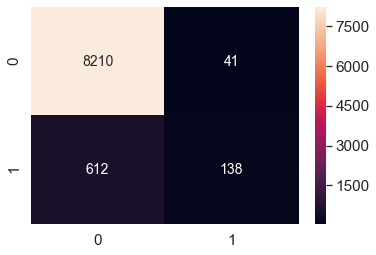

In [113]:
#Making predictions
y_pred=rfc.predict(X_test)
df_cm=pd.DataFrame(confusion_matrix(y_test,y_pred),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={"size":14},fmt='g')
plt.show()

In [114]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(precision)
print(recall)

Sensitivity:0.828
Specificity:0.817
Accuracy:0.818
0.2919605077574048
0.828


In [116]:
pred_prob_test=rfc.predict_proba(X_test)[:,1]
print("AUC is :{:2.2f}".format(metrics.roc_auc_score(y_test,pred_prob_test)))

AUC is :0.83


Since the sensitivity is poor, we will tune the hyperparameters.

In [118]:
#HyperParameter Tuning
param_grid={
    'max_depth':[4,8,10],
    'min_samples_leaf':range(100,300,100),
    'min_samples_split':range(200,400,100),
    'n_estimators':[100,200,300,500],
    'max_features':[5,10]
}
rf_model1=RandomForestClassifier(class_weight={0:0.08,1:0.92})
grid_search=GridSearchCV(estimator=rf_model1,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1,scoring='recall')
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 56.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.08, 1: 0.92},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                     

In [119]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 200,
 'min_samples_split': 300,
 'n_estimators': 200}

In [121]:
#Model with best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=10,min_samples_leaf=200,min_samples_split=300,max_features=10,n_estimators=200,class_weight={0:0.08,1:0.92})
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.08, 1: 0.92},
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=300, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [122]:
#Make prediction
y_pred=rfc.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 1], dtype=int64)

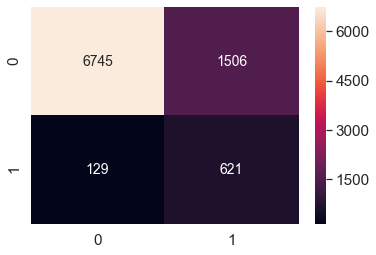

In [123]:
df_cm=pd.DataFrame(confusion_matrix(y_test,y_pred),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={"size":14},fmt='g')
plt.show()

In [124]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(precision)
print(recall)

Sensitivity:0.828
Specificity:0.817
Accuracy:0.818
0.2919605077574048
0.828


In [126]:
pred_prob_test=rfc.predict_proba(X_test)[:,1]
print("AUC is :{:2.2f}".format(metrics.roc_auc_score(y_test,pred_prob_test)))

AUC is :0.90


Now the model metrics such as sensitivity and area under the curve are all inline and satisfactory

In [127]:
#Important features
feature_labels=X_train.columns
for imp_features in zip(feature_labels,rfc.feature_importances_):
    print(imp_features)

('arpu_6', 0.0016599353038432307)
('arpu_7', 0.004620314746637642)
('arpu_8', 0.02570679170779288)
('onnet_mou_6', 0.0014717574451189428)
('onnet_mou_7', 0.002619494580247848)
('onnet_mou_8', 0.006954680855995471)
('offnet_mou_6', 0.0015073850168159791)
('offnet_mou_7', 0.002547856339974597)
('offnet_mou_8', 0.013328772922909161)
('roam_ic_mou_6', 0.00022214762121491378)
('roam_ic_mou_7', 0.0018963810834765)
('roam_ic_mou_8', 0.030377554001578648)
('roam_og_mou_6', 0.0001260948392534352)
('roam_og_mou_7', 0.0020176082901064763)
('roam_og_mou_8', 0.028058294350082644)
('loc_og_t2t_mou_6', 0.001116097235066884)
('loc_og_t2t_mou_7', 0.0009626997587825142)
('loc_og_t2t_mou_8', 0.033987764939511646)
('loc_og_t2m_mou_6', 0.0019722812109564717)
('loc_og_t2m_mou_7', 0.0031385507456173126)
('loc_og_t2m_mou_8', 0.0607458545250792)
('loc_og_t2f_mou_6', 0.00031686007915250543)
('loc_og_t2f_mou_7', 0.0018675189175680936)
('loc_og_t2f_mou_8', 0.009406550913684916)
('loc_og_t2c_mou_6', 0.000133770964

In [128]:
imp_features_df=pd.concat([pd.Series(feature_labels),pd.Series(rfc.feature_importances_)],axis=1).rename(columns={0:'Imp_Features',1:'Weights'})
imp_features_df.head(10)

,Imp_Features,Weights
0,arpu_6,0.001660
1,arpu_7,0.004620
2,arpu_8,0.025707
3,onnet_mou_6,0.001472
4,onnet_mou_7,0.002619
5,onnet_mou_8,0.006955
6,offnet_mou_6,0.001507
7,offnet_mou_7,0.002548
8,offnet_mou_8,0.013329
9,roam_ic_mou_6,0.000222


In [129]:
#Top 10 features
top_10_features=imp_features_df.sort_values('Weights',ascending=False).head(10)
top_10_features.head(10)

,Imp_Features,Weights
65,loc_ic_mou_8,0.092974
59,loc_ic_t2m_mou_8,0.089103
20,loc_og_t2m_mou_8,0.060746
29,loc_og_mou_8,0.060685
80,total_ic_mou_8,0.058372
101,last_day_rch_amt_8,0.054829
95,total_rech_amt_8,0.053425
53,total_og_mou_8,0.046419
56,loc_ic_t2t_mou_8,0.044677
98,max_rech_amt_8,0.035033


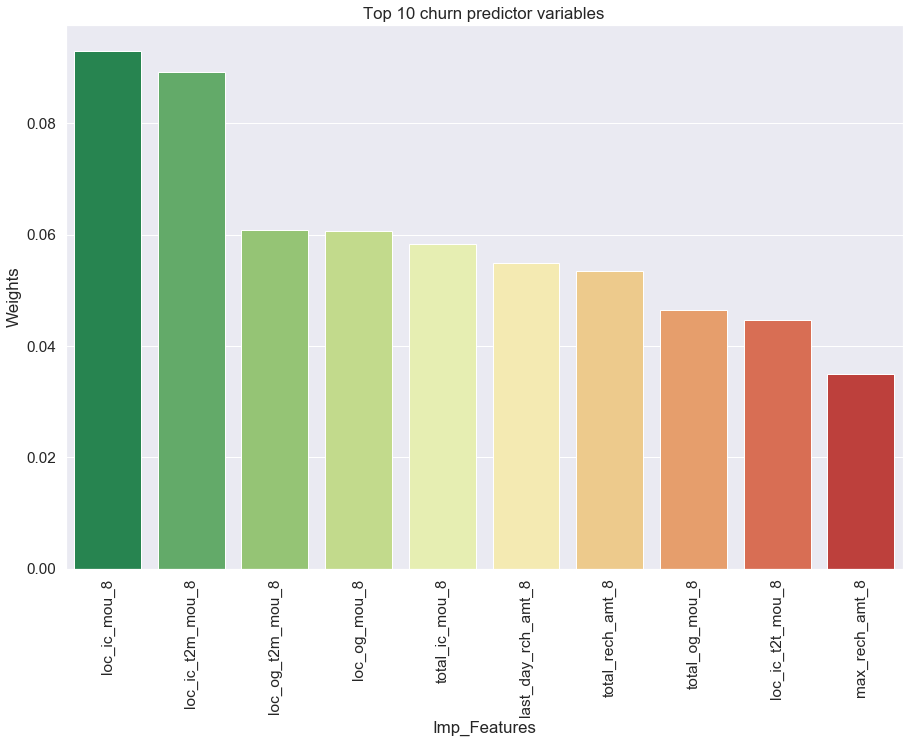

In [131]:
plt.figure(figsize=(15,10))
diag_plot=sns.barplot(data=top_10_features,x='Imp_Features',y='Weights',palette='RdYlGn_r')
diag_plot.set_title("Top 10 churn predictor variables")
plt.xticks(rotation=90)
plt.show()

### Inferences:

From the above barplot we can infer that the most important features that impact the churning of the customers are, Local incoming calls minutes of usage,Local incoming calls minutes of usage to other mobile operators,Local outgoing calls minutes of usage to other mobile operators and so on.

Hence the action phase plays important role in predicting the churnability of the customer.

### Suggestions:

1. Introduce the personalized offers to the active customers.<br/>
2. Introduce new offers for the customers using voice calls actively for both incoming and outgoing.<br/>
3. Increase the minutes of usage for the incoming and outgoing calls to enhance customer voice calls.<br/>
4. Provide the cheaper rates for the recharge amounts for the active customers who use voice calls regularly.<br/>
5. Instead of providing monthly recharges, provide exclusive offers for quarterly recharge packs and yearly recharge packs.